回归问题

In [7]:
# 回归问题
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target, test_size=0.25,random_state=0)


In [19]:
len(diabetes.data)

442

In [8]:
from sklearn.linear_model import LinearRegression

regr =  LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)

In [10]:
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.3594009098971551

In [11]:
regr.coef_

array([ -43.26774487, -208.67053951,  593.39797213,  302.89814903,
       -560.27689824,  261.47657106,   -8.83343952,  135.93715156,
        703.22658427,   28.34844354])

In [12]:
regr.intercept_

153.06798218266258

岭回归

In [17]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=0.5)
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.3779945322584898

[0.35666062386954533, 0.35746283698006753, 0.3620966901740398, 0.36901969445308314, 0.37718014165808966, 0.3779945322584898, 0.35695757658096805, 0.3099598422291955, 0.21684372519369555, 0.14333082046176293, 0.08510213246754672, 0.03823080729308037, 0.01987303546048602, 0.010084979388563453, 0.004002466836889318, 0.0019386937860356168]
5


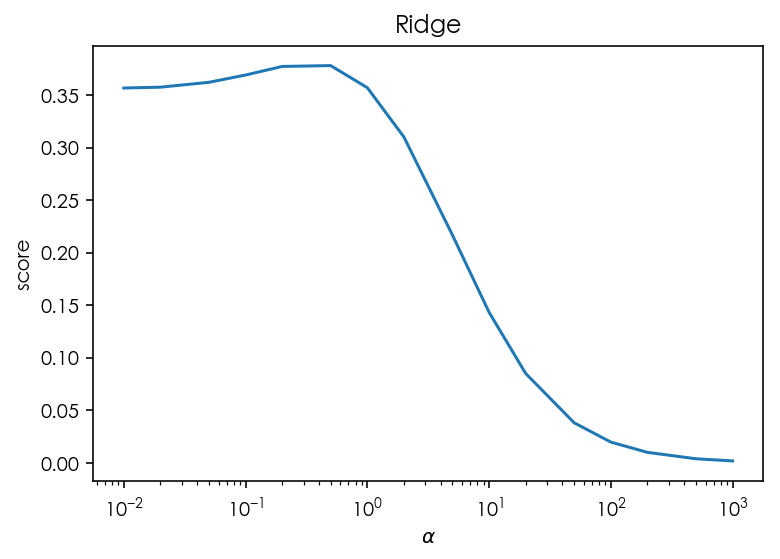

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 使用 scikit-learn 自带的一个糖尿病病人的数据集
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)

alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
scores = []
for i, alpha in enumerate(alphas):
    regr = Ridge(alpha=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))

print(scores)
print(np.argmax(scores))
## 绘图

plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(alphas, scores)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"score")
ax.set_xscale('log')
ax.set_title("Ridge")
plt.show()

In [24]:
np.set_printoptions(suppress=True)
alphas = np.logspace(-4, -0.5, 30) # 以 10 为底
alphas

array([0.0001    , 0.00013204, 0.00017433, 0.00023018, 0.00030392,
       0.00040128, 0.00052983, 0.00069956, 0.00092367, 0.00121957,
       0.00161026, 0.00212611, 0.00280722, 0.00370651, 0.0048939 ,
       0.00646167, 0.00853168, 0.01126482, 0.01487352, 0.01963828,
       0.02592944, 0.03423598, 0.04520354, 0.05968457, 0.07880463,
       0.10404983, 0.13738238, 0.18139307, 0.23950266, 0.31622777])

In [23]:
10**(-.5)

0.31622776601683794

Automatically created module for IPython interactive environment
Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


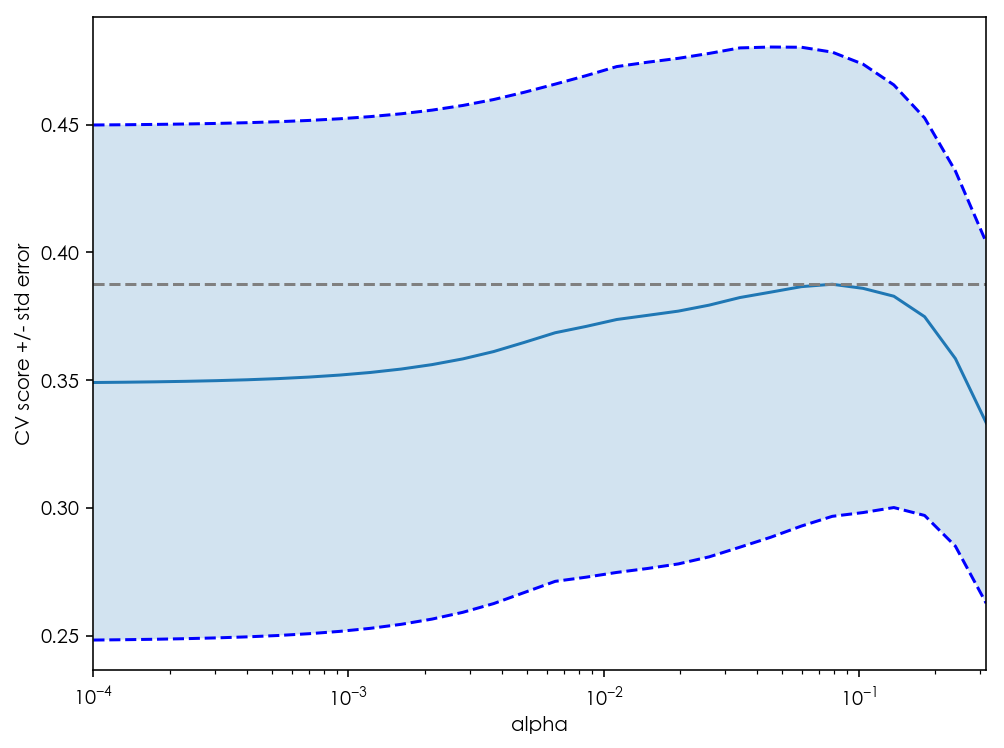

In [25]:
from __future__ import print_function

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()
